<a href="https://colab.research.google.com/github/fatememvi/MHEALTH_HAR_ML/blob/main/MHEALTH_HAR_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os


In [2]:
from google.colab import files

# Upload file
uploaded = files.upload()

Saving mhealth+dataset.zip to mhealth+dataset.zip


In [5]:
zip_file = 'mhealth+dataset.zip'
#Unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('mhealth_data') #Extract to folder 'mhealth_data'

    #list files in the folder
    for filename in os.listdir('mhealth_data'):
        print(filename)

MHEALTHDATASET


In [6]:
import os

# List all files in the folder
folder_path = '/content/mhealth_data/MHEALTHDATASET'
os.listdir(folder_path)


['mHealth_subject2.log',
 'mHealth_subject1.log',
 'mHealth_subject9.log',
 'mHealth_subject8.log',
 'mHealth_subject10.log',
 'mHealth_subject5.log',
 'mHealth_subject4.log',
 'mHealth_subject3.log',
 'README.txt',
 'mHealth_subject6.log',
 'mHealth_subject7.log']

In [7]:
import glob

# Find all .log files in the folder
log_files = glob.glob(folder_path + '/*.log')

# Read and combine all files
df_list = []
for file in log_files:
    temp_df = pd.read_csv(file, sep='\s+', engine='python')  # Adjust sep if needed
    df_list.append(temp_df)

# Combine all into one dataframe
df = pd.concat(df_list, ignore_index=True)

# Preview
df.head()


<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3308760082.py:10: SyntaxWarning: invalid escape sequence '\s'
  temp_df = pd.read_csv(file, sep='\s+', engine='python')  # Adjust sep if needed


,-9.8646,0.2986,1.69,-0.25955,-0.14652,0.49965,-9.668,1.5216,-0.47866,-0.53471,...,-0.86815,-7.0806,-6.6875,2.249,-0.64902,-0.13758,0.82328,-1.6286,-1.2796,-2.5469
0,-9.7753,0.381060,1.6132,-0.12977,-0.058608,0.40572,-9.5801,1.4001,-0.48423,-0.54409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-9.6195,0.169430,1.7205,-0.10466,-0.037677,0.42741,-9.6488,1.4593,-0.48423,-0.54409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-9.7610,0.169380,1.5837,-0.11722,-0.037677,0.32193,-9.4522,1.3119,-0.48423,-0.54409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-9.8078,-0.013582,1.6514,-0.13815,-0.054422,0.46731,-9.6397,1.3769,-0.49165,-0.52345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-9.7913,0.169610,1.5311,-0.16327,-0.066981,0.29467,-9.7289,1.3707,-0.49165,-0.52345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Extract simple statistical features
stat_features = pd.DataFrame()

for col in X.columns:
    stat_features[col + '_mean'] = [X[col].mean()]
    stat_features[col + '_std'] = [X[col].std()]
    stat_features[col + '_min'] = [X[col].min()]
    stat_features[col + '_max'] = [X[col].max()]
    stat_features[col + '_median'] = [X[col].median()]

# Add target column
stat_features['Activity'] = y.mode()[0]  # example

/tmp/ipython-input-1306209506.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stat_features[col + '_mean'] = [X[col].mean()]
/tmp/ipython-input-1306209506.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stat_features[col + '_std'] = [X[col].std()]
/tmp/ipython-input-1306209506.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

In [21]:
# Features (columns 1 to 23)
X = df.iloc[:, 0:23]

# Target (column 24)
y = df.iloc[:, 23]


In [22]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Create the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Predict on test set
y_pred = clf.predict(X_test)


In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7423040382978199


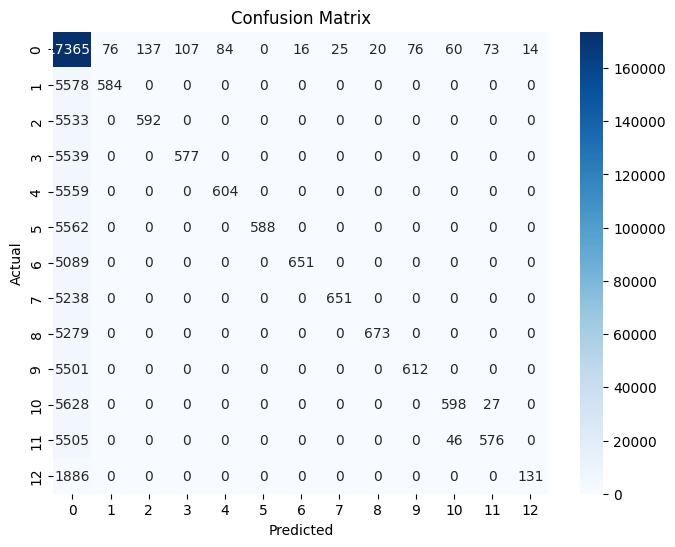

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()